In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from torchtext import vocab

In [3]:
mammals = ['beaver', 'dolphin', 'otter', 'seal', 'whale']
fish = ['goldfish', 'flatfish', 'ray', 'shark', 'trout']
flowers = ['orchid', 'poppy', 'rose', 'sunflower', 'tulip']
food_containers = ['bottle', 'bowl', 'can', 'cup', 'plate']
fruit_and_vegetables = ['apple', 'mushroom', 'orange', 'pear', 'pepper']
household_device = ['clock', 'keyboard', 'lamp', 'telephone', 'television']
household_furniture = ['bed', 'chair', 'couch', 'table', 'wardrobe']
insects = ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach']
large_carnivores = ['bear', 'leopard', 'lion', 'tiger', 'wolf']
large_man_made = ['bridge', 'castle', 'house', 'road', 'skyscraper']
large_natural_scenes = ['cloud', 'forest', 'mountain', 'plain', 'sea']
large_omnivores = ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo']
medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
non_insect_invertebrates = ['crab', 'lobster', 'snail', 'spider', 'worm']
people = ['baby', 'boy', 'girl', 'man', 'woman']
reptiles = ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle']
small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
trees = ['maple', 'oak', 'palm', 'pine', 'willow']
vehicles1 = ['bicycle', 'bus', 'motorcycle', 'truck', 'train']
vehicles2 = ['mower', 'rocket', 'streetcar', 'tank', 'tractor']
super_class_list = [mammals, small_mammals, medium_sized_mammals, people, large_omnivores, large_carnivores, non_insect_invertebrates, reptiles, fish, insects, 
                    flowers, trees, fruit_and_vegetables, food_containers, household_device, household_furniture, 
    vehicles1, vehicles2, large_man_made, large_natural_scenes]

In [4]:
glove = vocab.pretrained_aliases["glove.840B.300d"]()

In [5]:
class_vectors = []
super_target = []
class_id = 0
for super_class_id, super_class in enumerate(super_class_list):
    print('Super class group {}:'.format(super_class_id))
    for class_name in super_class:
        class_id += 1
        print('class {}: {}-{}'.format(class_id, super_class_id, class_name))
        class_vectors.append(glove.vectors[glove.stoi[class_name]])
        super_target.append(super_class_id)
class_vectors = np.stack(class_vectors)

Super class group 0:
class 1: 0-beaver
class 2: 0-dolphin
class 3: 0-otter
class 4: 0-seal
class 5: 0-whale
Super class group 1:
class 6: 1-hamster
class 7: 1-mouse
class 8: 1-rabbit
class 9: 1-shrew
class 10: 1-squirrel
Super class group 2:
class 11: 2-fox
class 12: 2-porcupine
class 13: 2-possum
class 14: 2-raccoon
class 15: 2-skunk
Super class group 3:
class 16: 3-baby
class 17: 3-boy
class 18: 3-girl
class 19: 3-man
class 20: 3-woman
Super class group 4:
class 21: 4-camel
class 22: 4-cattle
class 23: 4-chimpanzee
class 24: 4-elephant
class 25: 4-kangaroo
Super class group 5:
class 26: 5-bear
class 27: 5-leopard
class 28: 5-lion
class 29: 5-tiger
class 30: 5-wolf
Super class group 6:
class 31: 6-crab
class 32: 6-lobster
class 33: 6-snail
class 34: 6-spider
class 35: 6-worm
Super class group 7:
class 36: 7-crocodile
class 37: 7-dinosaur
class 38: 7-lizard
class 39: 7-snake
class 40: 7-turtle
Super class group 8:
class 41: 8-goldfish
class 42: 8-flatfish
class 43: 8-ray
class 44: 8-sh

In [13]:
super_target

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19]

In [33]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(class_vectors)

/home/2021/yujun/Storage/anaconda3/envs/pytorchEnv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/2021/yujun/Storage/anaconda3/envs/pytorchEnv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


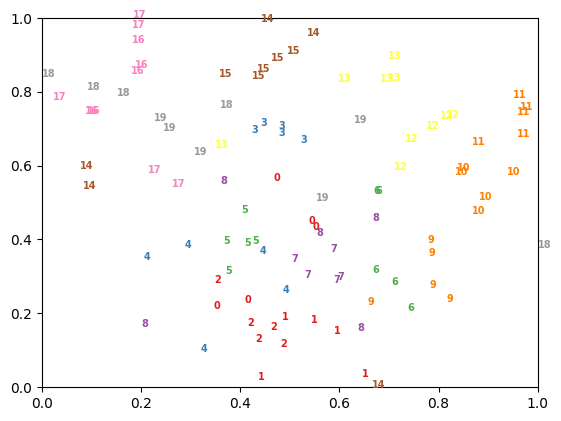

In [34]:
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
fig = plt.figure()
# plt.scatter(X_norm[:, 0], X_norm[:, 1], c=super_target, cmap=plt.cm.Spectral)
class_num = len(np.unique(super_target))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(super_target[i]), color=plt.cm.Set1(super_target[i] / class_num),
				 fontdict={'weight': 'bold', 'size': 7})
plt.xticks()
plt.yticks()
plt.show()

In [23]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=501)
X_tsne = tsne.fit_transform(class_vectors)

/home/2021/yujun/Storage/anaconda3/envs/pytorchEnv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


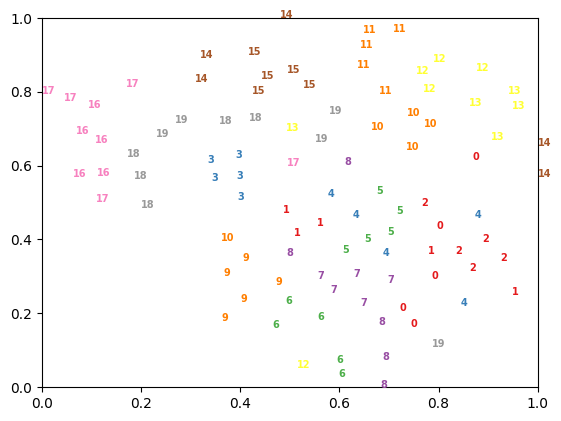

In [32]:
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
fig = plt.figure()
# plt.scatter(X_norm[:, 0], X_norm[:, 1], c=super_target, cmap=plt.cm.Spectral)
class_num = len(np.unique(super_target))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(super_target[i]), color=plt.cm.Set1(super_target[i] / class_num),
				 fontdict={'weight': 'bold', 'size': 7})
plt.xticks()
plt.yticks()
plt.show()